In [170]:
import pandas as pd
from matplotlib import pyplot as plt


In [171]:
titanic_train=pd.read_csv('titanic_train .csv')
titanic_test=pd.read_csv('titanic_test.csv')


In [172]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
titanic_train.shape

(891, 12)

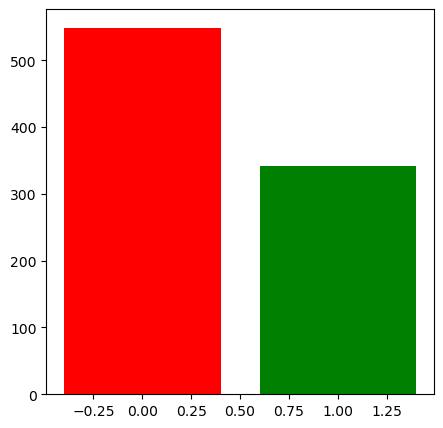

In [174]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train[ 'Survived' ].value_counts().keys()),list(titanic_train[ 'Survived' ].value_counts()),color=["r","g"])
plt.show()


In [175]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

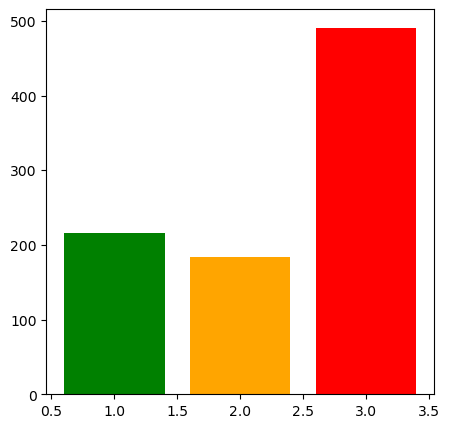

In [176]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train[ 'Pclass' ].value_counts().keys()),list(titanic_train[ 'Pclass' ].value_counts()),color=["r","g","Orange"])
plt.show()

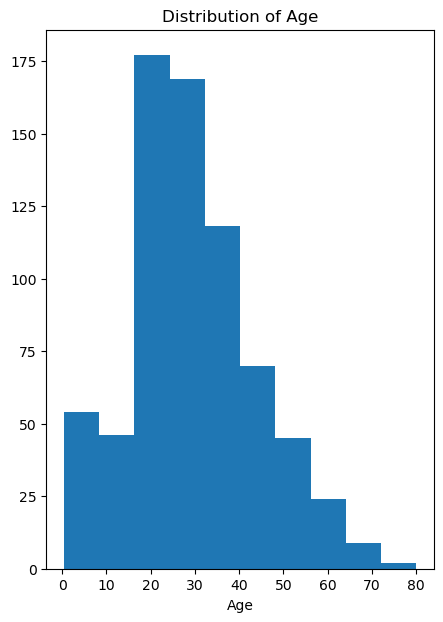

In [177]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train[ 'Age' ])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()


In [178]:
titanic_train['Age'].isnull().sum()

177

In [179]:
def impute_nan(df,variable):
    titanic_train[variable+"_random"] = titanic_train[variable]
    ## it will have the random sample to fill the na
    random_sample=titanic_train[variable].dropna().sample(titanic_train[variable  ].isnull().sum(),random_state=0)  
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=titanic_train[titanic_train[variable].isnull()].index
    titanic_train.loc[titanic_train[variable].isnull(),variable+'_random' ]=random_sample

In [180]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
impute_nan(titanic_train,'Age')


In [182]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [183]:
titanic_train = titanic_train.drop('Age',axis=1)

In [184]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [185]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [186]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)


In [187]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [188]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [189]:
titanic_train.drop(['Sex'],axis=1,inplace=True)

In [190]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S,35.0


In [191]:
titanic_train = pd.concat([titanic_train,sex] ,axis=1)

In [192]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,male
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S,35.0,1


In [193]:
x_train=titanic_train[['Age_random','male']]
y_train=titanic_train[[ 'Survived' ]]


In [194]:
def impute_nan(df,variable):
    titanic_test[variable+"_random"] = titanic_test[variable]
    ## it will have the random sample to fill the na
    random_sample=titanic_test[variable].dropna().sample(titanic_test[variable  ].isnull().sum(),random_state=0)  
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=titanic_test[titanic_test[variable].isnull()].index
    titanic_test.loc[titanic_test[variable].isnull(),variable+'_random' ]=random_sample

In [195]:
impute_nan(titanic_test,'Age')

In [196]:
titanic_test = titanic_test.drop('Age',axis=1)

In [197]:
sex = pd.get_dummies(titanic_test['Sex'],drop_first=True)

In [198]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0


In [199]:
titanic_test = pd.concat([titanic_test,sex] ,axis=1)

In [200]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,male
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0,1
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0,0


In [201]:
titanic_test.drop(['Sex'],axis=1,inplace=True)

In [202]:
titanic_test.head()

,PassengerId,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,male
0,892,3,"Kelly, Mr. James",0,0,330911,7.8292,NaN,Q,34.5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0000,NaN,S,47.0,0
2,894,2,"Myles, Mr. Thomas Francis",0,0,240276,9.6875,NaN,Q,62.0,1
3,895,3,"Wirz, Mr. Albert",0,0,315154,8.6625,NaN,S,27.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.2875,NaN,S,22.0,0


In [203]:
x_test = titanic_test[['Age_random','male']]

In [204]:
from sklearn.tree import DecisionTreeClassifier


In [205]:
dtc = DecisionTreeClassifier()


In [206]:
dtc. fit(x_train,y_train)


DecisionTreeClassifier()

In [207]:
y_test = dtc.predict(x_test)

In [208]:
titanic_test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [209]:
titanic_test['Survived']=y_test


In [210]:
titanic_test.head()

,PassengerId,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,male,Survived
0,892,3,"Kelly, Mr. James",0,0,330911,7.8292,NaN,Q,34.5,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0000,NaN,S,47.0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,0,240276,9.6875,NaN,Q,62.0,1,0
3,895,3,"Wirz, Mr. Albert",0,0,315154,8.6625,NaN,S,27.0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.2875,NaN,S,22.0,0,1


In [212]:
final_df=titanic_test.drop(['Pclass','Name','male','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age_random'],axis=1)

In [213]:
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [215]:
final_df.to_csv('tit2.csv',index=False)